# Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. 
In this project, you will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.
The data set has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.


## Business problem overview
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.
In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.


Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data understanding and Exploration

In [3]:
#Reading the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

In [4]:
#observe the different feature type present in the data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are 284807 rows and 31 columns

Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
share=[normal_share,fraud_share]

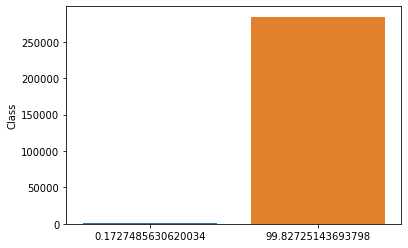

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.barplot(x= share,y=classes)

Here in the bar plot we see 99.82 are non fraud and 0.17 are fraud

Text(0.5, 1.0, 'Non fraud and Fraud classes')

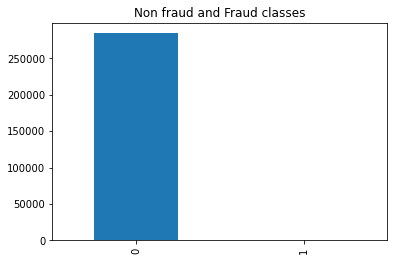

In [7]:
df['Class'].value_counts().plot(kind='bar').set_title('Non fraud and Fraud classes')# 1 is fraud

Here we can directly see the class is highly imbalance 

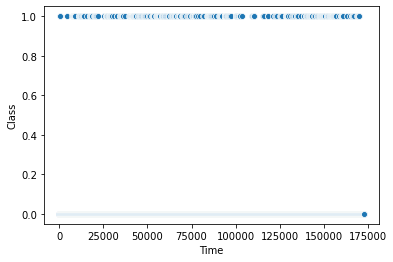

In [8]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(data=df,x='Time',y='Class')

Here in distribution of classes with time, we can directly see time lapse between the fraud transtion is less as compare to non fraud.

In [9]:
data_fraud=df[df["Class"]==1]
data_non_fraud=df[df["Class"]==0]

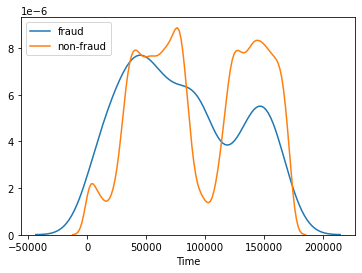

In [10]:
a=sns.distplot(data_fraud["Time"],label="fraud",hist=False)
a=sns.distplot(data_non_fraud["Time"],label="non-fraud",hist=False)

There is no specific pattern for Fraud detection so we can remove Time column

In [11]:
# Drop unnecessary columns
df.drop(columns=['Time'],inplace=True)# Here ''Time '' column is acting like a series which is not in use for classification

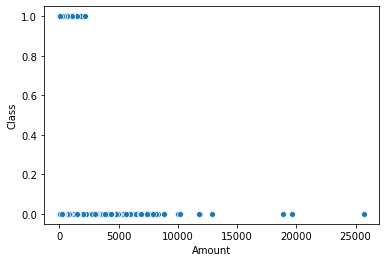

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(data=df, x="Amount",y="Class", palette="deep")#1 is fraud

Here in scatterplot of distribution of classes with amount directly shows that most of the fraud transition is  between 0 to 5000 which is low amount whereas Non fraud transition happen across all the ranges.
There is some specific pattern so amount is useful feature for fraud detection.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

### Splitting the data into train & test data

In [6]:
#putting the class variable as the response variable
y= df["Class"]#class variable

#putting the  feature variable to X
X=df.drop("Class" ,axis=1)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [8]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Feature Scaling

We need to scale only Amount column as all the other columns are already scaled by PCA transformation.

In [9]:
#Standardisation method
from sklearn.preprocessing import StandardScaler

In [10]:
#Instantiate the Scaler
scaler=StandardScaler()

In [11]:
#Fit the data into scaler and transform
X_train["Amount"]=scaler.fit_transform(X_train[["Amount"]])

In [12]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,134039.0,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,124044.0,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,54997.0,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,137226.0,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,136246.0,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


### Scaling the test set

We will not fit the test set we only transform

In [13]:
X_test["Amount"]=scaler.transform(X_test[["Amount"]])
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,43906.0,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,102638.0,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,52429.0,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,155444.0,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,134084.0,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


### Plotting the distribution of a variable

In [14]:
#list of columns
col=X_train.columns
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

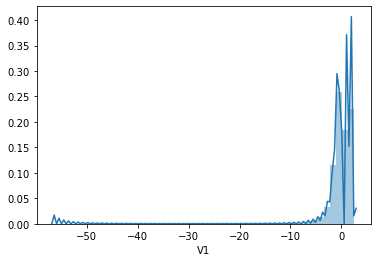

In [23]:
#plt.figure(figsize(6,5)
sns.distplot(X_train['V1'],)

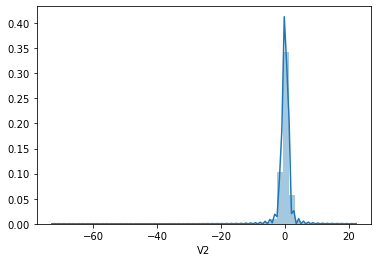

In [24]:
sns.distplot(X_train['V2'],)

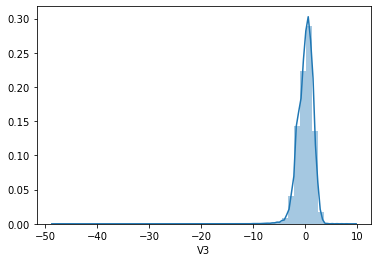

In [25]:
sns.distplot(X_train['V3'],)

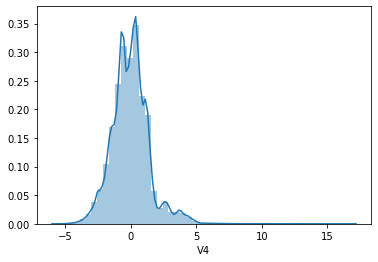

In [26]:
sns.distplot(X_train['V4'],)

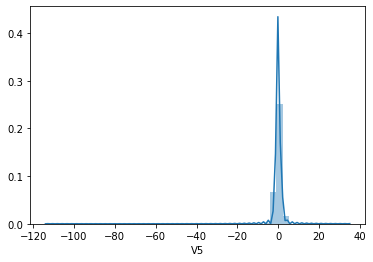

In [27]:
sns.distplot(X_train['V5'],)

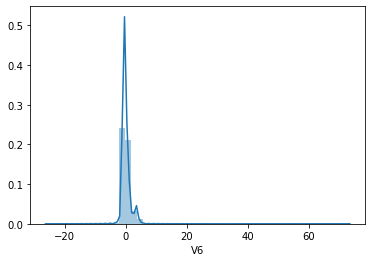

In [28]:
sns.distplot(X_train['V6'],)

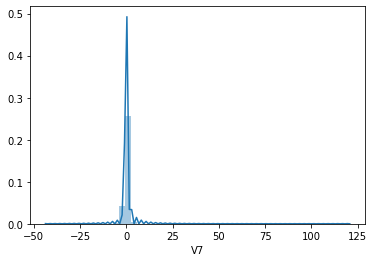

In [29]:
sns.distplot(X_train['V7'],)

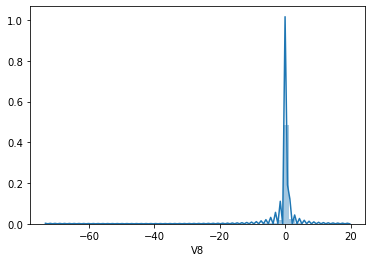

In [30]:
sns.distplot(X_train['V8'],)

Here we can see most of the variables are highly skewed.

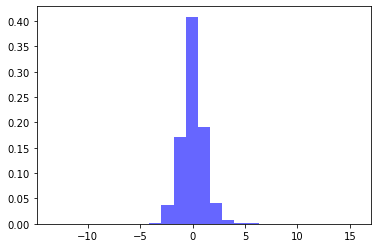

In [31]:
# plot the histogram of a variable from the dataset to see the skewness
# Plotting the histogram.
plt.hist(X_train["V9"], bins=25, density=True, alpha=0.6, color='b')
plt.show()


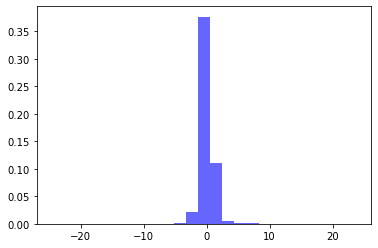

In [32]:
# Plotting the histogram.
plt.hist(X_train["V10"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

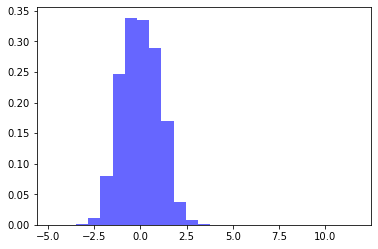

In [33]:
# Plotting the histogram.
plt.hist(X_train["V11"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

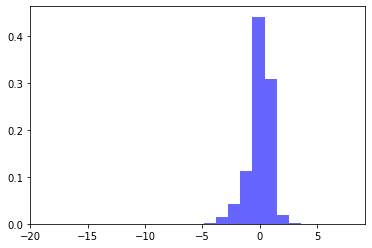

In [34]:
# Plotting the histogram.
plt.hist(X_train["V12"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

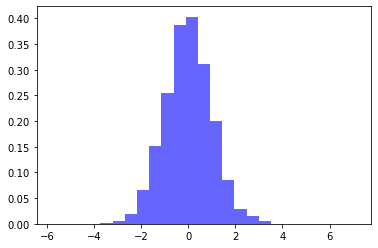

In [35]:
# Plotting the histogram.
plt.hist(X_train["V13"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

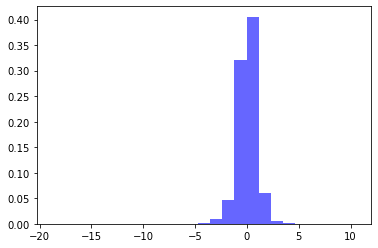

In [36]:
# Plotting the histogram.
plt.hist(X_train["V14"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

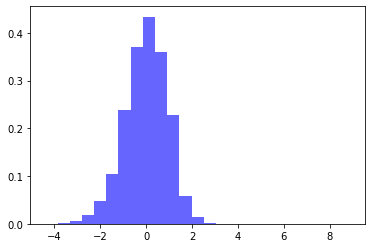

In [37]:
# Plotting the histogram.
plt.hist(X_train["V15"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

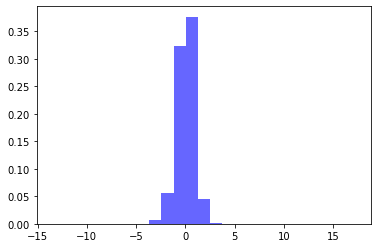

In [38]:
# Plotting the histogram.
plt.hist(X_train["V16"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

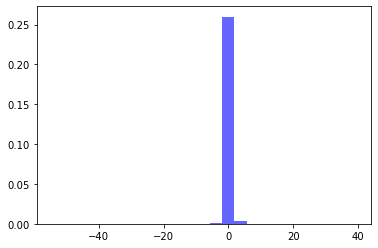

In [39]:
# Plotting the histogram.
plt.hist(X_train["V20"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

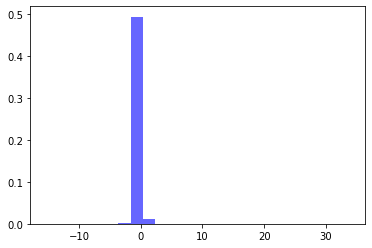

In [40]:
# Plotting the histogram.
plt.hist(X_train["V28"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

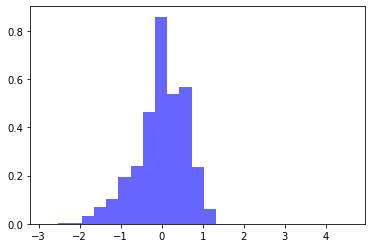

In [41]:
# Plotting the histogram.
plt.hist(X_train["V24"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

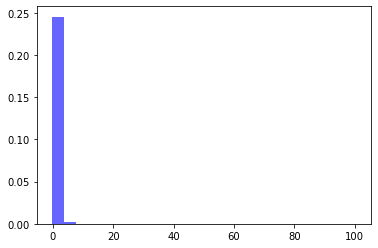

In [42]:
# Plotting the histogram.
plt.hist(X_train["Amount"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

There is skewness in the distribution we need to make distribution more gaussian.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [43]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
#Instantiate the powertransformer
pt=PowerTransformer(copy=False)
#Fit and transform the PT on the training data
X_train[col]=pt.fit_transform(X_train)


In [44]:
#Transform the test set
X_test[col]=pt.transform(X_test)


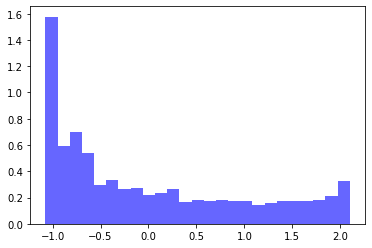

In [45]:
# plot the histogram of a variable from the dataset again to see the result 
# Plotting the histogram.
plt.hist(X_train["Amount"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

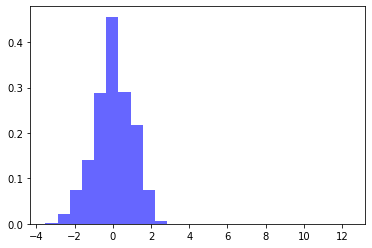

In [46]:
# Plotting the histogram.
plt.hist(X_train["V24"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

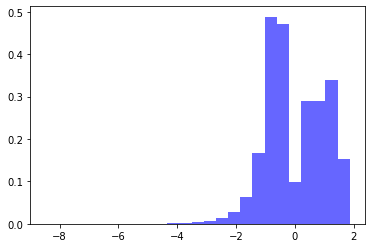

In [47]:
# Plotting the histogram.
plt.hist(X_train["V1"], bins=25, density=True, alpha=0.6, color='b')
plt.show()

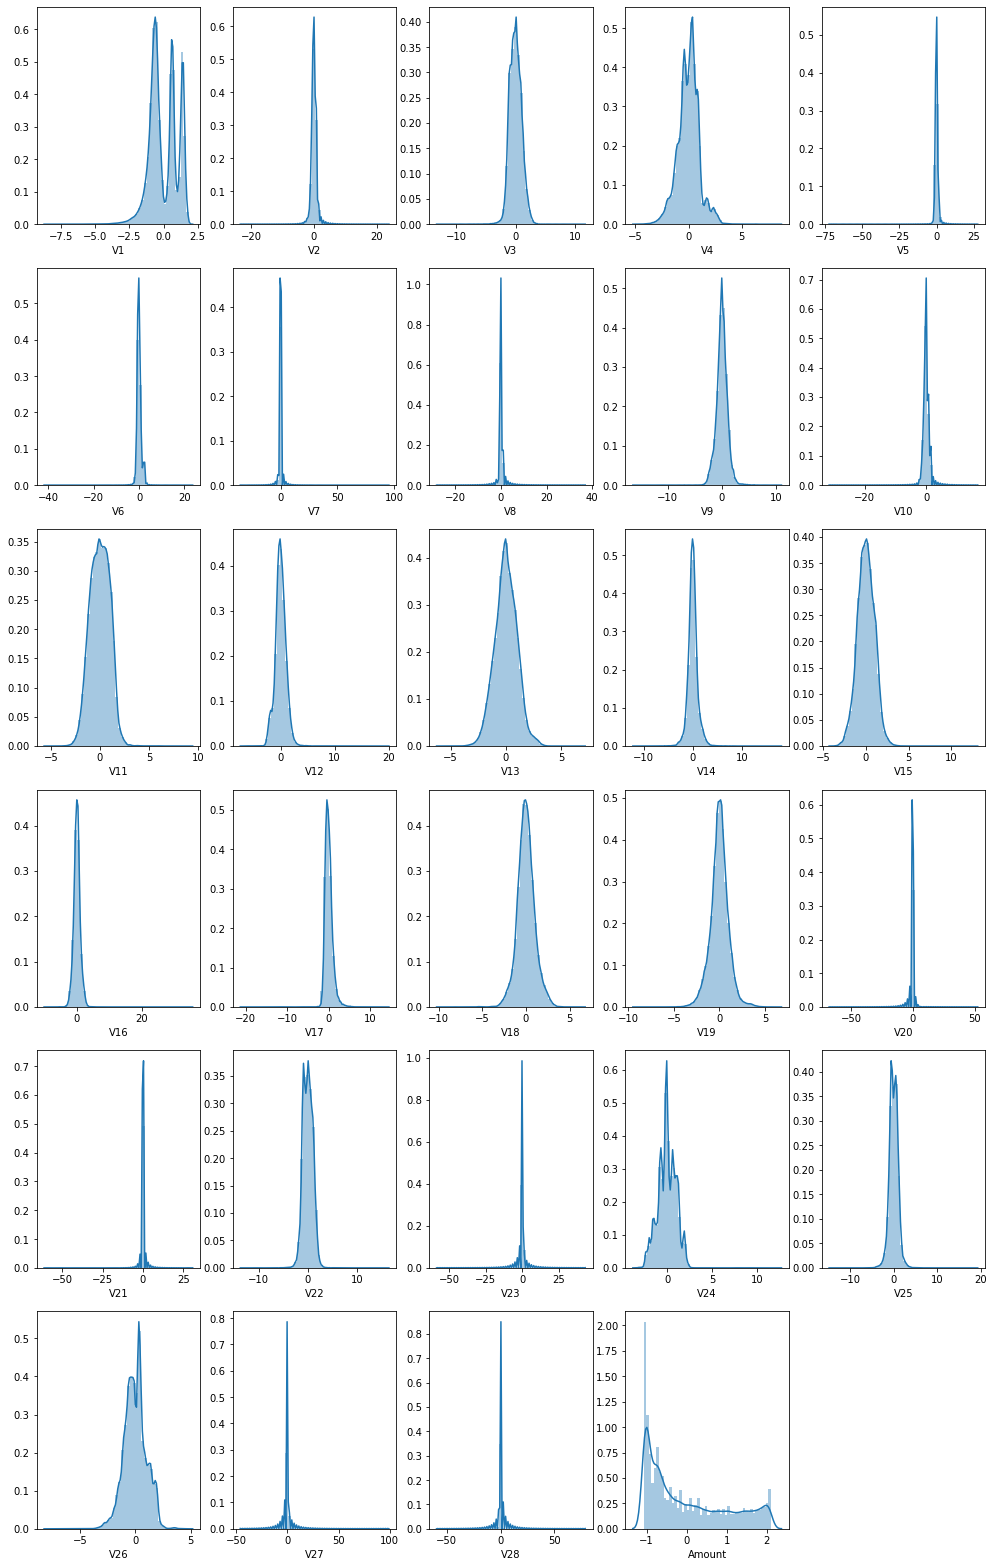

In [48]:
#checking on distribution of the variables of all the columns
a=0
plt.figure(figsize=(17,28))
for col in col:
    a=a+1
    plt.subplot(6,5,a)
    sns.distplot(X_train[col])

We can that all the variables are normlly distributed after transformation.

## Model Building on Imbalance Data
- Build different models on the imbalanced dataset and see the result
This is highly imbalance data set as there are only .0.17% transition which are fraudulent.

In this we are going to measure  ROC-AUC score for fair evaluation of the model.

## Logistic Regression

In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

In [21]:
#Importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Tuning Hypermeter C
C is the inverse of regularization strength in Logistic Regression.
Higher values of C correspond to less regularization.

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [51]:
#Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#creating kfold oblect  with 5 split
folds=KFold(n_splits=5, shuffle=True, random_state=4)
#Perform parameter
para={"C":[0.01,0.1,1,10,100,1000]}
#perform cross validation
model_cv=GridSearchCV(estimator=LogisticRegression(),param_grid=para,scoring="roc_auc",cv=folds,
                     verbose=1,return_train_score=True )
model_cv.fit(X_train,y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [52]:
#print the evaluation result by choosing a evaluation metric
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.198863,0.132844,0.070194,0.014237,0.01,{'C': 0.01},0.986856,0.987234,0.968390,0.982373,...,0.983719,0.008479,1,0.984043,0.984587,0.988474,0.985596,0.983075,0.985155,0.001849
1,2.723603,0.217032,0.070595,0.016132,0.1,{'C': 0.1},0.986104,0.987144,0.960929,0.980620,...,0.981416,0.010893,2,0.982402,0.983785,0.987917,0.984018,0.981187,0.983862,0.002270
2,2.733377,0.190805,0.064567,0.003440,1,{'C': 1},0.985834,0.986806,0.958452,0.979781,...,0.980484,0.011635,3,0.981722,0.983322,0.987492,0.983305,0.980489,0.983266,0.002365
3,3.008444,0.121590,0.066380,0.018757,10,{'C': 10},0.985798,0.986754,0.958181,0.979674,...,0.980375,0.011715,4,0.981632,0.983262,0.987435,0.983216,0.980404,0.983190,0.002375
4,3.010373,0.127633,0.067530,0.006458,100,{'C': 100},0.985793,0.986748,0.958155,0.979666,...,0.980365,0.011722,5,0.981625,0.983256,0.987429,0.983207,0.980396,0.983182,0.002376
5,2.900673,0.302998,0.071639,0.007576,1000,{'C': 1000},0.985793,0.986747,0.958153,0.979663,...,0.980363,0.011723,6,0.981623,0.983256,0.987428,0.983206,0.980395,0.983182,0.002376


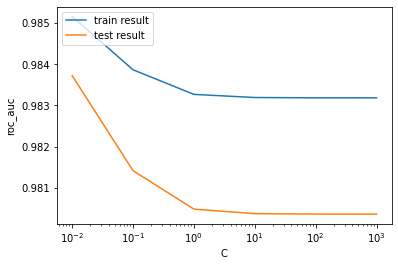

In [53]:
#plot of C versus train and validation scores
plt.figure(figsize=(8,6))
plt.plot(cv_results["param_C"],cv_results["mean_test_score"])
plt.plot(cv_results["param_C"],cv_results["mean_train_score"])
plt.xlabel("C")
plt.ylabel("roc_auc")
plt.legend(['test result','train result'], loc='upper left')
plt.xscale('log')

In [54]:
#Best score with best C
best_score=model_cv.best_score_
best_C_value=model_cv.best_params_['C']
print("The highest roc_auc is=")
print(best_score)
print("The highest roc_auc value at C=")
print(best_C_value)

The highest roc_auc is=
0.9837192853831933
The highest roc_auc value at C=
0.01


### Logistic regression with optimal C value

In [55]:
#putting best C
Logistic_imbalance=LogisticRegression(C=0.01)
#Fit the model
Logistic_imbalance_model=Logistic_imbalance.fit(X_train,y_train)

### Predition on the train set

In [56]:
y_train_pred=Logistic_imbalance_model.predict(X_train)

In [57]:
confusion=metrics.confusion_matrix(y_train,y_train_pred)

In [58]:
print(confusion)

[[227427     22]
 [   135    261]]


Now let's find out the true positive rate,true negative rate, false positive rate,false netative rate

In [59]:
# Predicted     not_fraud    fraud
# Actual
# not_fraud       227427 (TN)    22(FP)
# fraud             135(FN)       261(TP)

Here FN should be minimum so that we can detct fraud.

In [60]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [61]:
 #Let's check the overall accuracy.
print(metrics.accuracy_score(y_train,y_train_pred))

0.9993109350655051


In [62]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6590909090909091

In [63]:
# Let us calculate specificity
TN / float(TN+FP)

0.9999032750198946

In [64]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



### ROC on the train set

In [36]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve(area=%0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 ,1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('true positive rate')
    plt.legend(loc='lower right')
    plt.show()
    return None

In [66]:
#predicted probability
y_train_pred_proba=Logistic_imbalance_model.predict_proba(X_train)[:,1]

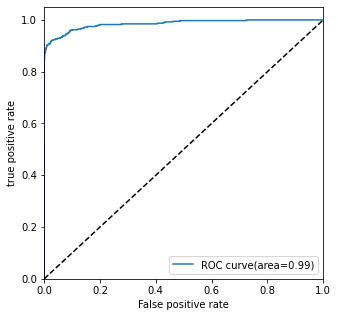

In [67]:
#plot the ROC curve
draw_roc(y_train,y_train_pred_proba)

### Predition on the test set

In [68]:
#predicting the test set
y_test_pred=Logistic_imbalance_model.predict(X_test)

In [69]:
confusion=metrics.confusion_matrix(y_test,y_test_pred)

In [70]:
print(confusion)

[[56850    16]
 [   42    54]]


In [71]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [74]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(y_train,y_train_pred))

0.9993109350655051


In [75]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5625

In [76]:
# Let us calculate specificity
TN / float(TN+FP)

0.9997186367952731

In [77]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



### ROC on the test set

In [78]:
#predicted probability
y_test_pred_proba=Logistic_imbalance_model.predict_proba(X_test)[:,1]

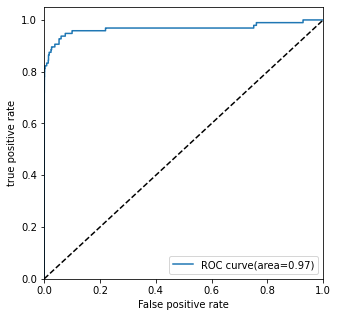

In [79]:
#plot the ROC plot
draw_roc(y_test,y_test_pred_proba)

We got auc=0.99  on train set and 0.97 on test set of logistic regression.

Let's explore other algorithms like XGBoost,Random Forest,Decision Tree.We are not going to explore SVM as it does not work well on large data set.Also KNN is time consuming so we are not using them.

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## XGBoost

Finding the best number of trees in XGBoost¶

In [72]:
from xgboost import XGBClassifier

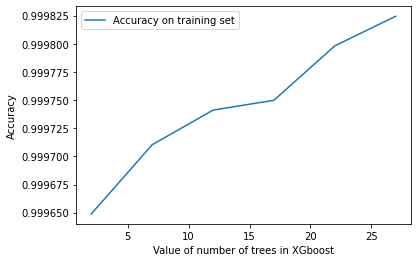

In [80]:
tree_range = range(2, 30, 5)
score1=[]
#score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree,eval_metric='mlogloss')
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
#    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
#plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [81]:
#Hyper parameter tuning with XGBoost
#creating a KFold  object
folds=3
#specify range of hyperparameters
param_grid ={'learning_rate':[0.2,0.6],
            'subsample':[0.3,0.6,0.9]}
#specify model
xgb_model=XGBClassifier(max_depth=2,n_estimators=200,eval_metric='mlogloss')
#set up GridSearchCV()
model_cv=GridSearchCV(estimator=xgb_model,
                     param_grid=param_grid,scoring='roc_auc',
                     cv=folds,verbose=1,return_train_score=True)
#fit the model
model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 12.6min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
            

In [82]:
#print the evaluation result by choosing a evaluation metric
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,29.887849,1.475105,0.151429,0.007653,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979854,0.971801,0.981423,0.977693,0.004215,1,0.999894,0.999940,0.999847,0.999894,0.000038
1,40.446121,0.216358,0.166670,0.007366,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.977143,0.972788,0.977688,0.975873,0.002193,3,0.999966,0.999987,0.999966,0.999973,0.000010
2,51.606828,1.265694,0.161461,0.007365,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978125,0.970882,0.980136,0.976381,0.003974,2,0.999950,0.999983,0.999911,0.999948,0.000029
3,30.413032,1.084781,0.162899,0.009400,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.961154,0.974479,0.973310,0.969648,0.006025,6,0.999999,1.000000,0.999995,0.999998,0.000002
4,43.839020,0.303547,0.194911,0.013185,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.970611,0.965528,0.983906,0.973348,0.007748,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,53.474823,1.246147,0.189479,0.043146,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972799,0.973557,0.974113,0.973490,0.000539,4,1.000000,1.000000,1.000000,1.000000,0.000000


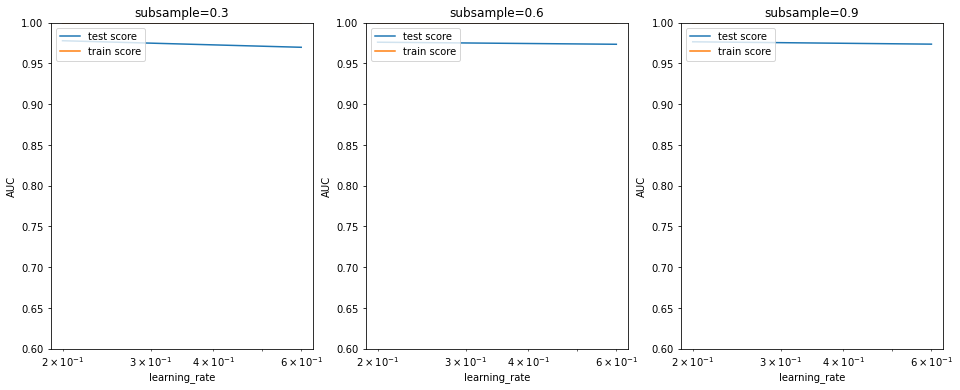

In [83]:
#plotting the learning rate vs auc 
plt.figure(figsize=(16,6))
param_grid={'learning_rate':[0.2,0.6],
           'subsample':[0.3,0.6,0.9]}
for n,subsample in enumerate (param_grid["subsample"]):
    #subplot 1/n
    plt.subplot(1,len(param_grid["subsample"]),n+1)
    df=cv_result[cv_result['param_subsample']==subsample]
    
    plt.plot(df["param_learning_rate"],df["mean_test_score"])
    plt.plot(df["param_learning_rate"],df["mean_train_score"])
    plt.xlabel("learning_rate")
    plt.ylabel("AUC")
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(["test score","train score"], loc="upper left")
    plt.xscale("log")

Model with optimal hyperparameter 
We see the train score almost touches to 1.Among the huperparametes ,we choosethe best parameter as learning rate:0.2  and sample:0.3

In [84]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [85]:
#chosen hyper parameter
params={'learning_rate':0.2,
       'max_depth':2,
       'n_estimators':200,
       'objective':'binary:logistic'}
#fit model on training data
xgb_imb_model=XGBClassifier(params=params)
xgb_imb_model.fit(X_train,y_train)

[09:25:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic'},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### predition on train set

In [86]:
#preditions on the train set
y_train_pred_xgb=xgb_imb_model.predict(X_train)

In [87]:
confusion_xgb=metrics.confusion_matrix(y_train,y_train_pred_xgb)
print(confusion_xgb)

[[227449      0]
 [     0    396]]


In [88]:
TP=confusion_xgb[1,1] #True Positive
TN=confusion_xgb[0,0]#true negitive
FP=confusion_xgb[0,1]#false positive
FN=confusion_xgb[1,0]#false negative

In [89]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(y_train,y_train_pred_xgb))

1.0


In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

1.0

In [91]:
#Let's see the specificity
TN/float(TN+FP)

1.0

In [92]:
#F1 score
print("f1 score",f1_score(y_train,y_train_pred_xgb))

f1 score 1.0


In [93]:
print(classification_report(y_train,y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [94]:
#predicted probability
y_train_pred_proba_imb_xgb=xgb_imb_model.predict_proba(X_train)[:,1]

In [95]:
#roc_auc
auc=metrics.roc_auc_score(y_train,y_train_pred_proba_imb_xgb)
auc

1.0

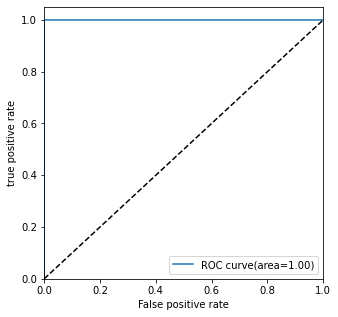

In [96]:
#plot the ROC curve
draw_roc(y_train,y_train_pred_proba_imb_xgb)

### Prediction on test set

In [97]:
#Predition on the test set
y_test_pred_xgb=xgb_imb_model.predict(X_test)

In [98]:
confusion_xgb=metrics.confusion_matrix(y_test,y_test_pred_xgb)
print(confusion_xgb)

[[56859     7]
 [   24    72]]


In [99]:
TP=confusion_xgb[1,1] #True Positive
TN=confusion_xgb[0,0]#true negitive
FP=confusion_xgb[0,1]#false positive
FN=confusion_xgb[1,0]#false negative
 
    #Let's check the overall accuracy.
print(metrics.accuracy_score(y_test,y_test_pred_xgb))

0.9994557775359011


In [100]:
print("sensitivity",TP / float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_test,y_test_pred_xgb))

sensitivity 0.75
specificity= 0.999876903597932
f1 score= 0.8228571428571428


In [101]:
#classification report
print(classification_report(y_test,y_test_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [102]:
#predict probability
y_test_pred_probability=xgb_imb_model.predict_proba(X_test)[:,1]

In [103]:
#roc-auc
auc=metrics.roc_auc_score(y_test,y_test_pred_probability)
auc

0.9785370798602564

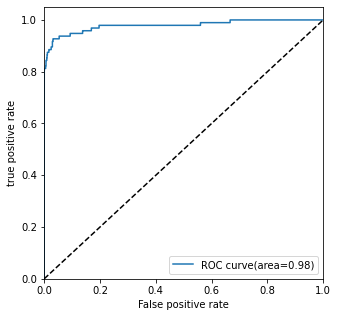

In [104]:
#plot the ROC curve
draw_roc(y_test,y_test_pred_probability)

## Decision Tree on imbalance data set

In [68]:
#Importing decision grid
from sklearn.tree import DecisionTreeClassifier

In [107]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
   # 'criterion': ["entropy", "gini"]
}

#n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, scoring='roc_auc',
                          cv = 3, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  7.8min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [108]:
cv_results=pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,12.863576,0.459633,0.124818,0.025848,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923868,0.930129,0.004428,4
1,12.394876,0.251196,0.098962,0.014726,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923871,0.930129,0.004426,5
2,12.963734,0.451777,0.107072,0.015565,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
3,13.088926,0.587421,0.117656,0.016930,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933279,0.936720,0.944598,0.938199,0.004738,2
4,26.066678,0.601656,0.109346,0.008065,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924913,0.916464,0.938009,0.926462,0.008864,6
5,26.628935,0.189906,0.103074,0.015519,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924956,0.923871,0.945546,0.931458,0.009972,3
6,25.501728,0.298337,0.105342,0.011883,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933441,0.919668,0.921744,0.924951,0.006063,8
7,24.659673,0.465553,0.110307,0.001308,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933448,0.919663,0.921758,0.924956,0.006065,7


In [109]:
#printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-" ,grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382050164508641
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [110]:
#Model with optimal hyperparameters
dt_imb_model=DecisionTreeClassifier(criterion='gini',
                                   random_state=100,
                                   max_depth=5,
                                   min_samples_leaf=100,
                                   min_samples_split=100)
dt_imb_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

### Prediction on the train set

In [111]:
#prediction on the train set
y_train_pred=dt_imb_model.predict(X_train)

In [112]:
#Confusion matrix
confusion=metrics.confusion_matrix(y_train,y_train_pred)

In [113]:
print(confusion)

[[227374     75]
 [   114    282]]


In [114]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [115]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(y_train,y_train_pred))

0.9991704887094297


In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7121212121212122

In [117]:
#Let's see the specificity
TN/float(TN+FP)

0.9996702557496405

In [118]:
#F1 score
print("f1 score",f1_score(y_train,y_train_pred))

f1 score 0.7490039840637449


In [119]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [120]:
#predicted probability
y_train_pred_proba_dt=dt_imb_model.predict_proba(X_train)[:,1]

In [121]:
#roc_auc
auc=metrics.roc_auc_score(y_train,y_train_pred_proba_dt)
auc

0.9534547393930157

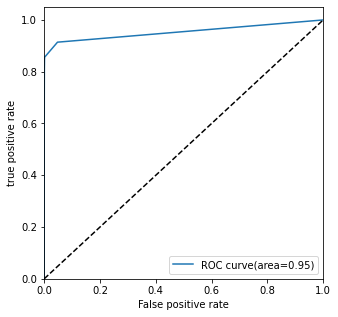

In [122]:
#plot the ROC CURVE
draw_roc(y_train,y_train_pred_proba_dt)

### Prediction on the test set

In [123]:
#prediction on the train set
y_test_pred=dt_imb_model.predict(X_test)

In [124]:
#Confusion matrix
confusion=metrics.confusion_matrix(y_test,y_test_pred)

In [125]:
print(confusion)

[[56836    30]
 [   40    56]]


In [126]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [127]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(y_test,y_test_pred))

0.9987711105649381


In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5833333333333334

In [130]:
#Let's see the specificity
TN/float(TN+FP)

0.9994724439911371

In [131]:
#F1 score
print("f1 score",f1_score(y_test,y_test_pred))

f1 score 0.6153846153846155


In [132]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [133]:
#predicted probability
y_test_pred_proba_dt=dt_imb_model.predict_proba(X_test)[:,1]

In [134]:
#roc_auc
auc=metrics.roc_auc_score(y_test,y_test_pred_proba_dt)
auc

0.92174979703748

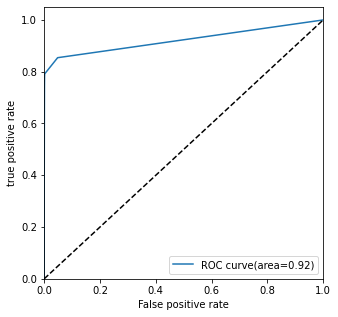

In [135]:
#plot the ROC CURVE
draw_roc(y_test,y_test_pred_proba_dt)

### Random Forest

In [136]:
#Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [137]:
param_grid={
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50,150,50),
    'min_samples_split': range(50,150,50),
    'n_estimators':[100,200,300],
    'max_features':[10,20]
}
#create a base model
rf=RandomForestClassifier()
#Instantiate the grid search model
grid_search=GridSearchCV(estimator=rf,
                        param_grid=param_grid,cv=2,n_jobs=-1,verbose=1,
                        return_train_score=True)
#Fit the model
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 89.7min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [138]:
#optimal accuracy score and hyper parameter
print("accuracy score =",grid_search.best_score_)
print("hyperparameter=",grid_search.best_params_)

accuracy score = 0.9992889901682516
hyperparameter= {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [141]:
#model with the best hyperparameter
rfc_imb_model=RandomForestClassifier(bootstrap=True,
                                     max_depth=5,
                                     min_samples_split=100,
                                     min_samples_leaf=50,
                                     max_features=10,
                                     n_estimators=100)

In [142]:
#Fit the model
rfc_imb_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100)

### Prediction on train set 

In [143]:
#Predition on the train set
y_train_pred=rfc_imb_model.predict(X_train)

In [144]:
confusion=metrics.confusion_matrix(y_train,y_train_pred)
print(confusion)

[[227399     50]
 [    99    297]]


In [145]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [146]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_train,y_train_pred))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_train,y_train_pred))

Accuracy= 0.9993460466545239
Sensitivity= 0.75
specificity= 0.9997801704997604
f1 score= 0.7994616419919246


In [147]:
#classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.86      0.75      0.80       396

    accuracy                           1.00    227845
   macro avg       0.93      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



In [148]:
#predict probability
y_train_pred_probability=rfc_imb_model.predict_proba(X_train)[:,1]

In [149]:
#roc-auc
auc=metrics.roc_auc_score(y_train,y_train_pred_probability)
auc

0.9789647760308218

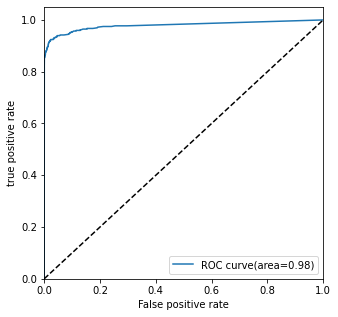

In [150]:
#plot the ROC CURVE
draw_roc(y_train,y_train_pred_probability)

### prediction on test set

In [151]:
#Predition on the test set
y_test_pred=rfc_imb_model.predict(X_test)

In [152]:
confusion=metrics.confusion_matrix(y_test,y_test_pred)
print(confusion)

[[56840    26]
 [   34    62]]


In [153]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [154]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_test,y_test_pred))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_test,y_test_pred))

Accuracy= 0.9989466661985184
Sensitivity= 0.6458333333333334
specificity= 0.9995427847923188
f1 score= 0.6739130434782609


In [155]:
#classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.70      0.65      0.67        96

    accuracy                           1.00     56962
   macro avg       0.85      0.82      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [156]:
#predict probability
y_test_pred_probability=rfc_imb_model.predict_proba(X_test)[:,1]

In [157]:
#roc-auc
auc=metrics.roc_auc_score(y_test,y_test_pred_probability)
auc

0.9508970833479878

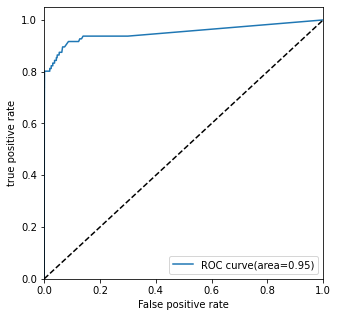

In [158]:
#plot the ROC CURVE
draw_roc(y_test,y_test_pred_probability)

Here we can see ROC on train set of Random forest is 0.98 and on test set is 0.95.

## Choosing the best model for Imbalance class 

### Here we can directly see that XGBoost is the best model for imbalance class classification as AUC of train set=1 and test set=0.98 and it is computationally easier than random forest.

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [159]:
clf = XGBClassifier(max_depth=2,n_estimators=200,eval_metric='mlogloss')  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
fpr,tpr,thresholds=metrics.roc_curve(y_train,y_train_pred_proba_imb_xgb )
threshold=thresholds[np.argmax(tpr-fpr)]
print("threshold",threshold)

threshold 0.8474788


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


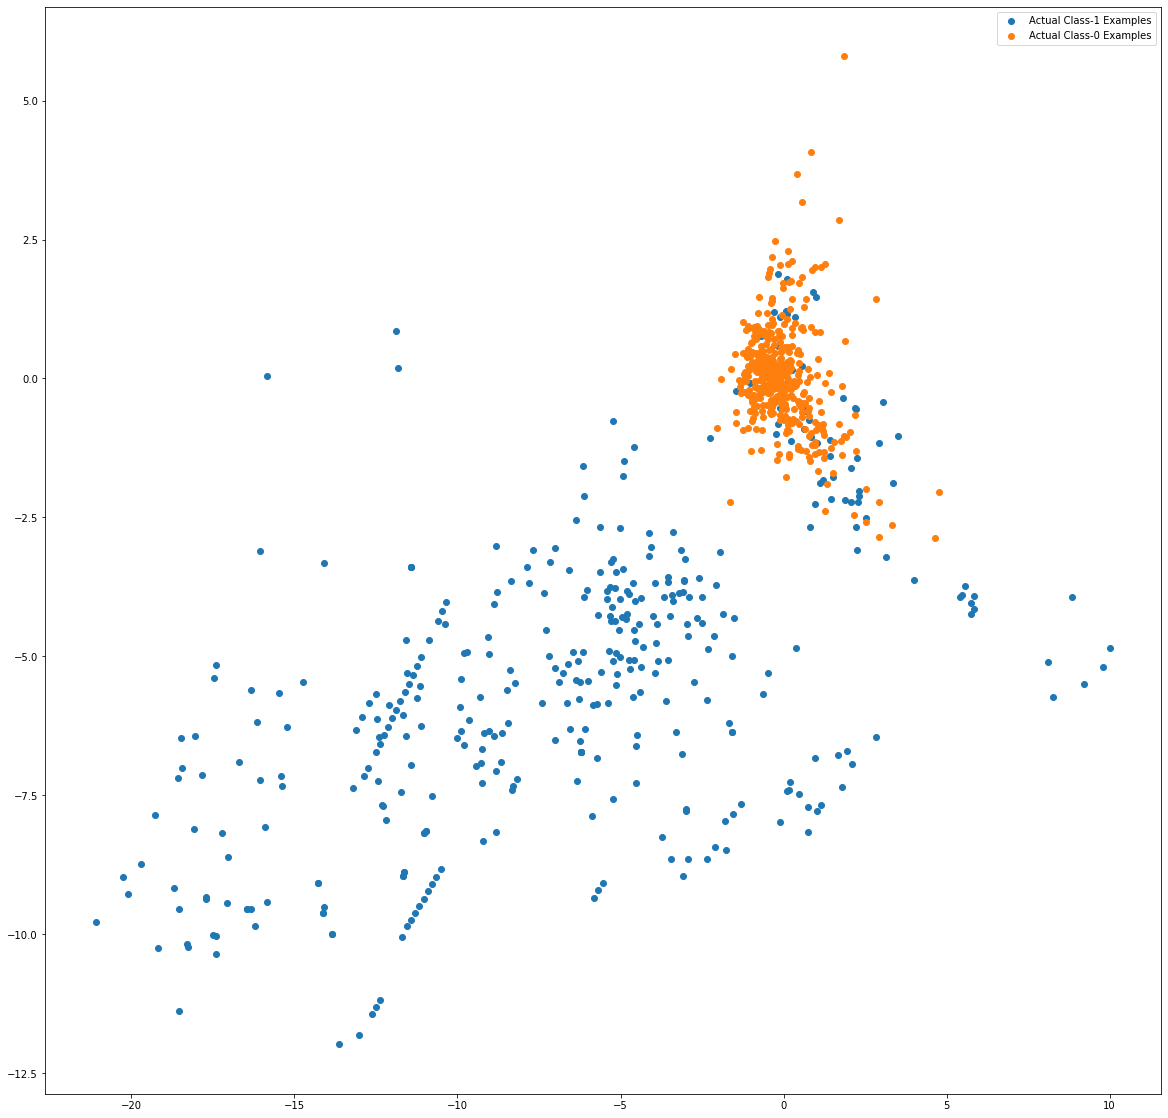

In [161]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

The top variable which are important to detect the fraud  are

1st=17

2nd=14

3rd=10


## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

Here we are not going to build model using Undersampling as it makes lots of data loss.

## Model Building
- Build different models on the balanced dataset and see the result

## Random Oversampling

In [16]:
 #- import the packages
from imblearn.over_sampling import RandomOverSampler
from imblearn import over_sampling
#perform cross validation & then balance classes on X_train_ros& y_train_ros using Random Oversampling
ros=RandomOverSampler()
X_train_ros,y_train_ros=ros.fit_resample(X_train,y_train)



### Logistic regression using random over sampling

In [18]:
# Logistic Regression
from sklearn import linear_model #import the package

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [22]:
#Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#creating kfold oblect  with 5 split
folds=KFold(n_splits=5, shuffle=True, random_state=4)
#Perform parameter
para={"C":[0.01,0.1,1,10,100,1000]}
#perform cross validation
model_cv=GridSearchCV(estimator=LogisticRegression(),param_grid=para,scoring="roc_auc",cv=folds,
                     verbose=1,return_train_score=True )
model_cv.fit(X_train_ros,y_train_ros)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [23]:
#print the evaluation result by choosing a evaluation metric
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.207998,1.730782,0.217890,0.174462,0.01,{'C': 0.01},0.959279,0.979892,0.959448,0.979378,...,0.967305,0.010074,6,0.958930,0.979580,0.959438,0.979718,0.959174,0.967368,0.010029
1,8.143300,3.099810,0.112496,0.011683,0.1,{'C': 0.1},0.959420,0.984809,0.959590,0.984385,...,0.969373,0.012435,1,0.959069,0.984529,0.959583,0.984503,0.959315,0.969400,0.012344
2,7.615660,2.939506,0.120284,0.009334,1,{'C': 1},0.959434,0.984811,0.959604,0.979403,...,0.968386,0.011337,4,0.959083,0.984531,0.959597,0.979741,0.959328,0.968456,0.011273
3,8.353629,3.680295,0.112496,0.006249,10,{'C': 10},0.959435,0.984811,0.959606,0.979404,...,0.968387,0.011336,3,0.959085,0.984538,0.959598,0.979742,0.959330,0.968458,0.011274
4,7.711430,2.829919,0.113938,0.006230,100,{'C': 100},0.959435,0.984811,0.959606,0.979404,...,0.968387,0.011336,2,0.959085,0.984531,0.959598,0.979742,0.959330,0.968457,0.011272
5,8.245622,3.793293,0.118964,0.018652,1000,{'C': 1000},0.959435,0.984793,0.959606,0.979404,...,0.968383,0.011331,5,0.959085,0.984523,0.959598,0.979742,0.959330,0.968456,0.011270


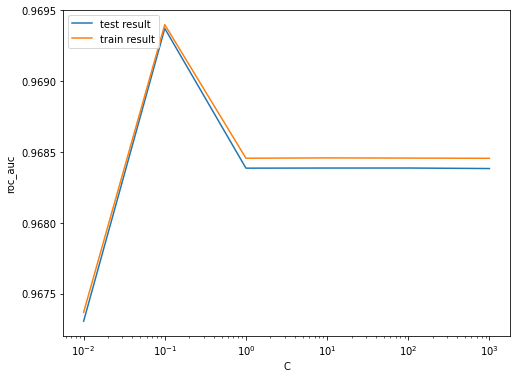

In [25]:
#plot of C versus train and validation scores
plt.figure(figsize=(8,6))
plt.plot(cv_result["param_C"],cv_result["mean_test_score"])
plt.plot(cv_result["param_C"],cv_result["mean_train_score"])
plt.xlabel("C")
plt.ylabel("roc_auc")
plt.legend(['test result','train result'], loc='upper left')
plt.xscale('log')

In [26]:
#Best score with best C
best_score=model_cv.best_score_
best_C_value=model_cv.best_params_['C']
print("The highest roc_auc is=")
print(best_score)
print("The highest roc_auc value at C=")
print(best_C_value)

The highest roc_auc is=
0.9693733689719333
The highest roc_auc value at C=
0.1


### Logistic regression with optimal C value

In [27]:
#putting best C
Logistic_balance_ros=LogisticRegression(C=0.1)
#Fit the model
Logistic_balance_ros_model=Logistic_balance_ros.fit(X_train_ros,y_train_ros)

### Prediction on the train set

In [28]:
y_train_pred=Logistic_balance_ros_model.predict(X_train_ros)

In [29]:
confusion=metrics.confusion_matrix(y_train_ros,y_train_pred)
print(confusion)

[[217915   9534]
 [ 27741 199708]]


In [30]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [31]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_train_ros,y_train_pred))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_train_ros,y_train_pred))

Accuracy= 0.9180585537856838
Sensitivity= 0.8780341966770573
specificity= 0.9580829108943104
f1 score= 0.9146421611620116


In [32]:
#classification report
print(classification_report(y_train_ros,y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92    227449
           1       0.95      0.88      0.91    227449

    accuracy                           0.92    454898
   macro avg       0.92      0.92      0.92    454898
weighted avg       0.92      0.92      0.92    454898



In [33]:
#predict probability
y_train_pred_probability=Logistic_balance_ros_model.predict_proba(X_train_ros)[:,1]

In [34]:
#roc-auc
auc=metrics.roc_auc_score(y_train_ros,y_train_pred_probability)
auc

0.9593449100037296

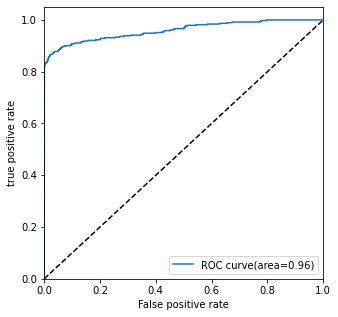

In [37]:
#plot the ROC CURVE
draw_roc(y_train_ros,y_train_pred_probability)

### Prediction on the test set

In [38]:
y_test_pred=Logistic_balance_ros_model.predict(X_test)

In [39]:
confusion=metrics.confusion_matrix(y_test,y_test_pred)
print(confusion)

[[54387  2479]
 [   12    84]]


In [40]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [41]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_test,y_test_pred))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_test,y_test_pred))

Accuracy= 0.9562690916751518
Sensitivity= 0.875
specificity= 0.9564062884676257
f1 score= 0.06318164723580293


In [42]:
#classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.03      0.88      0.06        96

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [43]:
#predict probability
y_test_pred_probability=Logistic_balance_ros_model.predict_proba(X_test)[:,1]

In [44]:
#roc-auc
auc=metrics.roc_auc_score(y_test,y_test_pred_probability)
auc

0.9478435781779387

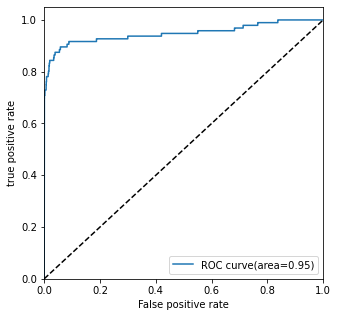

In [45]:
#plot the ROC CURVE
draw_roc(y_test,y_test_pred_probability)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## 2. XGBoost using Random oversampling

In [46]:
from xgboost import XGBClassifier

In [47]:
#Hyper parameter tuning with XGBoost
#creating a KFold  object
folds=3
#specify range of hyperparameters
param_grid ={'learning_rate':[0.2,0.6],
            'subsample':[0.3,0.6,0.9]}
#specify model
xgb_model=XGBClassifier(max_depth=2,n_estimators=200,eval_metric='mlogloss')
#set up GridSearchCV()
model_cv=GridSearchCV(estimator=xgb_model,
                     param_grid=param_grid,scoring='roc_auc',
                     cv=folds,verbose=1,return_train_score=True)
#fit the model
model_cv.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
            

In [48]:
#print the evaluation result by choosing a evaluation metric
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,58.283779,2.663219,0.325272,0.044439,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999916,0.999930,0.999907,0.999918,0.000010,5,0.999933,0.999938,0.999937,0.999936,2.086959e-06
1,72.785808,2.707523,0.317352,0.024223,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999907,0.999931,0.999910,0.999916,0.000011,6,0.999922,0.999937,0.999928,0.999929,6.119834e-06
2,80.974944,1.210964,0.341792,0.034867,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999923,0.999926,0.999917,0.999922,0.000003,4,0.999927,0.999933,0.999935,0.999932,3.289568e-06
3,54.494135,2.021335,0.319581,0.017121,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999992,0.999981,0.999977,0.999983,0.000007,3,0.999997,0.999997,0.999999,0.999997,8.580681e-07
4,69.073626,2.046252,0.317955,0.007106,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999998,0.999994,0.999979,0.999990,0.000008,1,0.999997,1.000000,0.999999,0.999999,9.518027e-07
5,79.785002,1.705752,0.298613,0.021923,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999995,0.999993,0.999975,0.999987,0.000009,2,1.000000,1.000000,0.999999,1.000000,6.109943e-07


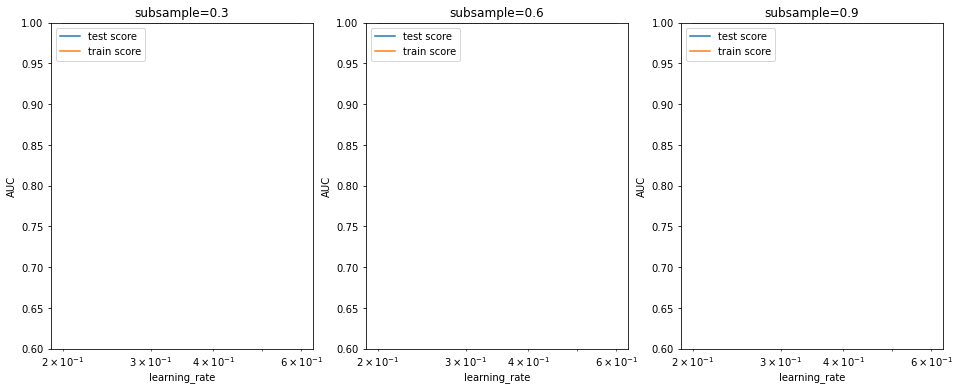

In [49]:
#plotting the learning rate vs auc 
plt.figure(figsize=(16,6))
param_grid={'learning_rate':[0.2,0.6],
           'subsample':[0.3,0.6,0.9]}
for n,subsample in enumerate (param_grid["subsample"]):
    #subplot 1/n
    plt.subplot(1,len(param_grid["subsample"]),n+1)
    df=cv_result[cv_result['param_subsample']==subsample]
    
    plt.plot(df["param_learning_rate"],df["mean_test_score"])
    plt.plot(df["param_learning_rate"],df["mean_train_score"])
    plt.xlabel("learning_rate")
    plt.ylabel("AUC")
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(["test score","train score"], loc="upper left")
    plt.xscale("log")

In [50]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [51]:
#chosen hyper parameter
params={'learning_rate':0.6,
       'max_depth':2,
       'n_estimators':200,
        'subsample':0.6,
       'objective':'binary:logistic'}
#fit model on training data
xgb_bal_ros_model=XGBClassifier(params=params)
xgb_bal_ros_model.fit(X_train_ros,y_train_ros)

[15:16:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Prediction on train set

In [52]:
#preditions on the train set
y_train_ros_pred_xgb=xgb_bal_ros_model.predict(X_train_ros)

In [94]:
confusion=metrics.confusion_matrix(y_train_ros,y_train_ros_pred_xgb)
print(confusion)

[[227449      0]
 [     0 227449]]


In [95]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [96]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_train_ros,y_train_ros_pred_xgb))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_train_ros,y_train_ros_pred_xgb))

Accuracy= 1.0
Sensitivity= 1.0
specificity= 1.0
f1 score= 1.0


In [97]:
#classification report
print(classification_report(y_train_ros,y_train_ros_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [98]:
#predict probability
y_train_ros_pred_probability=xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [99]:
#roc-auc
auc=metrics.roc_auc_score(y_train_ros,y_train_ros_pred_probability)
auc

1.0

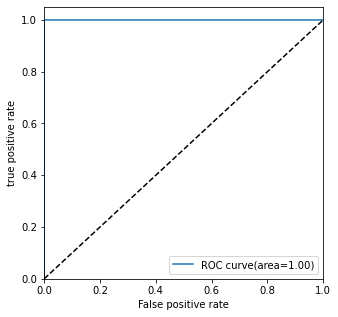

In [59]:
#plot the ROC CURVE
draw_roc(y_train_ros,y_train_ros_pred_probability)

### Prediction on test set

In [60]:
#Predition on the test set
y_test_ros_pred_xgb=xgb_bal_ros_model.predict(X_test)

In [88]:
confusion_xgb=metrics.confusion_matrix(y_test,y_test_ros_pred_xgb)
print(confusion_xgb)

[[56856    10]
 [   20    76]]


In [89]:
TP=confusion_xgb[1,1] #True Positive
TN=confusion_xgb[0,0]#true negitive
FP=confusion_xgb[0,1]#false positive
FN=confusion_xgb[1,0]#false negative

In [90]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_test,y_test_ros_pred_xgb))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_test,y_test_ros_pred_xgb))

Accuracy= 0.9994733330992591
Sensitivity= 0.7916666666666666
specificity= 0.9998241479970457
f1 score= 0.8351648351648352


In [91]:
#classification report
print(classification_report(y_test,y_test_ros_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.79      0.84        96

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [92]:
#predict probability
y_test_pred_probability=xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [93]:
#roc-auc
auc=metrics.roc_auc_score(y_test,y_test_pred_probability)
auc

0.970304641613618

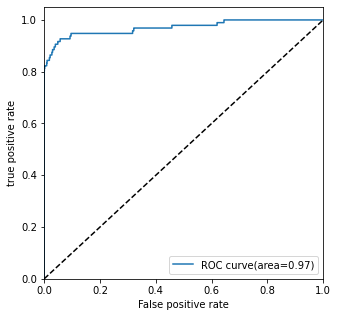

In [66]:
#plot the ROC CURVE
draw_roc(y_test,y_test_pred_probability)

## Decision Tree using Random over sampling

In [69]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
   # 'criterion': ["entropy", "gini"]
}

#n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, scoring='roc_auc',
                          cv = 3, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [70]:
cv_results=pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,15.556844,0.212786,0.249685,0.023083,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990291,0.990688,0.990135,0.990371,0.000233,6
1,16.085762,1.388459,0.247051,0.050143,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990291,0.990690,0.990135,0.990372,0.000234,5
2,15.264755,0.314768,0.228569,0.017194,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990267,0.990613,0.990057,0.990312,0.000229,8
3,17.256940,0.919111,0.243611,0.037935,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990274,0.990602,0.990067,0.990315,0.000220,7
4,26.202872,1.452321,0.292960,0.026564,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999564,0.999689,0.999609,0.999621,0.000052,1
5,26.101749,0.616518,0.233946,0.017805,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999507,0.999706,0.999601,0.999605,0.000081,3
6,24.275523,1.330669,0.256461,0.042740,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999642,0.999610,0.999609,0.999620,0.000015,2
7,24.319009,0.135813,0.222665,0.016070,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999555,0.999620,0.999616,0.999597,0.000030,4


In [71]:
#printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-" ,grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9996209048938663
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [72]:
#Model with optimal hyperparameters
dt_bal_model=DecisionTreeClassifier(criterion='gini',
                                   random_state=100,
                                   max_depth=10,
                                   min_samples_leaf=50,
                                   min_samples_split=50)
dt_bal_model.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

### Prediction on train set 

In [100]:
#preditions on the train set
y_train_ros_pred_dt=dt_bal_model.predict(X_train_ros)

In [101]:
confusion_dt=metrics.confusion_matrix(y_train_ros,y_train_ros_pred_dt)
print(confusion_dt)

[[226069   1380]
 [     0 227449]]


In [102]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [103]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_train_ros,y_train_ros_pred_dt))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_train_ros,y_train_ros_pred_dt))

Accuracy= 0.9969663528966933
Sensitivity= 1.0
specificity= 1.0
f1 score= 0.996975528077181


In [104]:
#classification report
print(classification_report(y_train_ros,y_train_ros_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [105]:
#predict probability
y_train_pred_probability=dt_bal_model.predict_proba(X_train_ros)[:,1]

In [106]:
#roc-auc
auc=metrics.roc_auc_score(y_train_ros,y_train_pred_probability)
auc

0.999725252857523

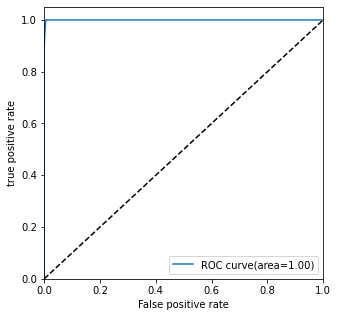

In [80]:
#plot the ROC CURVE
draw_roc(y_train_ros,y_train_pred_probability)

### Prediction on test set

In [81]:
#preditions on the train set
y_test_ros_pred_dt=dt_bal_model.predict(X_test)

In [82]:
confusion_dt=metrics.confusion_matrix(y_test,y_test_ros_pred_dt)
print(confusion_dt)

[[56477   389]
 [   21    75]]


In [83]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [84]:
#classification report
print(classification_report(y_test,y_test_ros_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.16      0.78      0.27        96

    accuracy                           0.99     56962
   macro avg       0.58      0.89      0.63     56962
weighted avg       1.00      0.99      1.00     56962



In [85]:
#predict probability
y_test_pred_probability=dt_bal_model.predict_proba(X_test)[:,1]

In [86]:
#roc-auc
auc=metrics.roc_auc_score(y_test,y_test_pred_probability)
auc

0.8896313445937232

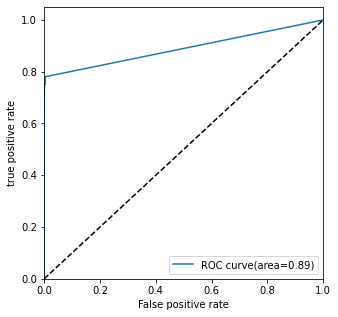

In [87]:
#plot the ROC CURVE
draw_roc(y_test,y_test_pred_probability)

Here in Random Over sampling we saw
logistic Regression shows ROC curve on train set =0.96 and on test set ROC=0.94

XGBoost shows ROC=1 on train and 0.97 on test set

Decision tree shows 0.99 Roc on train and 0.88 on test set

Although XGBoost is computationally expensive but it work well on Random over sampling.

## SMOTE (Synthetic Minority Oversampling Technique)

In [107]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE

In [109]:
#Instantiate SMOTE
sm=SMOTE(random_state=27)
#Fitting the smote to the train set
X_train_smote,y_train_smote=sm.fit_resample(X_train,y_train)

## logistic Regression

In [110]:
#Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#creating kfold oblect  with 5 split
folds=KFold(n_splits=5, shuffle=True, random_state=4)
#Perform parameter
para={"C":[0.01,0.1,1,10,100,1000]}
#perform cross validation
model_cv=GridSearchCV(estimator=LogisticRegression(),param_grid=para,scoring="roc_auc",cv=folds,
                     verbose=1,return_train_score=True )
model_cv.fit(X_train_smote,y_train_smote)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [113]:
#print the evaluation result by choosing a evaluation metric
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.377336,1.261846,0.115631,0.007657,0.01,{'C': 0.01},0.994717,0.987071,0.986640,0.986801,...,0.988491,0.003120,6,0.994274,0.987072,0.987176,0.987170,0.986929,0.988524,0.002876
1,7.715178,1.763568,0.122323,0.020464,0.1,{'C': 0.1},0.996419,0.987146,0.986717,0.986877,...,0.988892,0.003769,1,0.996112,0.987147,0.987251,0.987245,0.987003,0.988952,0.003581
2,6.666010,0.572935,0.133575,0.006993,1,{'C': 1},0.994766,0.987153,0.986724,0.986885,...,0.988567,0.003106,5,0.994322,0.987154,0.987258,0.987253,0.987011,0.988600,0.002862
3,7.121324,1.624413,0.128446,0.020428,10,{'C': 10},0.994767,0.987154,0.986725,0.986886,...,0.988568,0.003106,4,0.994323,0.987155,0.987259,0.987254,0.987012,0.988600,0.002863
4,6.103100,1.046054,0.112520,0.035582,100,{'C': 100},0.994767,0.987154,0.986725,0.986886,...,0.988568,0.003106,2,0.994323,0.987155,0.987259,0.987254,0.987012,0.988601,0.002863
5,7.089872,1.266911,0.132796,0.006892,1000,{'C': 1000},0.994767,0.987154,0.986725,0.986886,...,0.988568,0.003106,3,0.994323,0.987155,0.987259,0.987254,0.987012,0.988601,0.002863


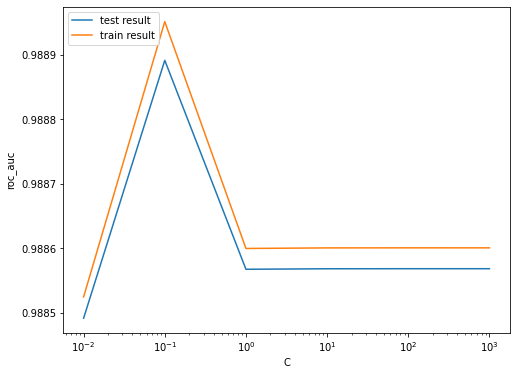

In [115]:
#plot of C versus train and validation scores
plt.figure(figsize=(8,6))
plt.plot(cv_results['param_C'],cv_results['mean_test_score'])
plt.plot(cv_results['param_C'],cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result','train result'], loc='upper left')
plt.xscale('log')

In [116]:
#Best score with best C
best_score=model_cv.best_score_
best_C_value=model_cv.best_params_['C']
print("The highest roc_auc is=")
print(best_score)
print("The highest roc_auc value at C=")
print(best_C_value)

The highest roc_auc is=
0.9888916324397901
The highest roc_auc value at C=
0.1


In [195]:
#Logistic regression with optimal C
logistic_bal_smote=LogisticRegression(C=0.1)

In [196]:
#Fit the model on the train set
logistic_bal_smote_model=logistic_bal_smote.fit(X_train_smote,y_train_smote)

## Prediction on the train set

In [197]:
y_train_pred=logistic_bal_smote_model.predict(X_train_smote)

In [198]:
confusion=metrics.confusion_matrix(y_train_smote,y_train_pred)
print(confusion)

[[224685   2764]
 [  7885 219564]]


In [123]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [124]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_train_smote,y_train_pred))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_train_smote,y_train_pred))

Accuracy= 0.9594502503858008
Sensitivity= 0.9501822386556986
specificity= 0.968718262115903
f1 score= 0.9590709191847022


In [125]:
#predict probability
y_train_pred_probability_log_bal_smote=logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

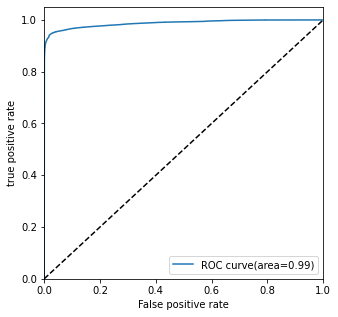

In [126]:
#plot the ROC CURVE
draw_roc(y_train_smote,y_train_pred_probability_log_bal_smote )

## Prediction on the test set

In [127]:
y_test_pred=logistic_bal_smote_model.predict(X_test)

In [128]:
confusion=metrics.confusion_matrix(y_test,y_test_pred)
print(confusion)

[[55007  1859]
 [   15    81]]


In [129]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [130]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_test,y_test_pred))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_test,y_test_pred))

Accuracy= 0.9671008742670553
Sensitivity= 0.84375
specificity= 0.9673091126507931
f1 score= 0.07956777996070727


In [131]:
#predict probability
y_test_pred_probability=logistic_bal_smote_model.predict_proba(X_test)[:,1]

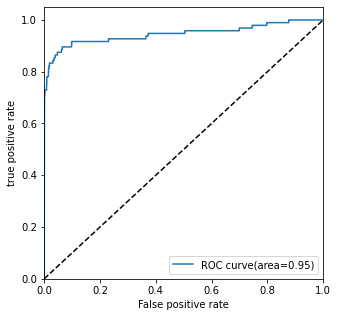

In [132]:
#plot the ROC CURVE
draw_roc(y_test,y_test_pred_probability)

In [ ]:
Model summary
roc on train=0.99
roc on test=0.95

## XGBoost

In [133]:
#Hyper parameter tuning with XGBoost
#creating a KFold  object
folds=3
#specify range of hyperparameters
param_grid ={'learning_rate':[0.2,0.6],
            'subsample':[0.3,0.6,0.9]}
#specify model
xgb_model=XGBClassifier(max_depth=2,n_estimators=200,eval_metric='mlogloss')
#set up GridSearchCV()
model_cv=GridSearchCV(estimator=xgb_model,
                     param_grid=param_grid,scoring='roc_auc',
                     cv=folds,verbose=1,return_train_score=True)
#fit the model
model_cv.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
            

In [134]:
#print the evaluation result by choosing a evaluation metric
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,81.722144,5.120422,0.361319,0.050637,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999905,0.999920,0.999913,0.999913,0.000006,4,0.999929,0.999931,0.999931,0.999930,8.808648e-07
1,107.635435,5.949947,0.314364,0.035774,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999897,0.999926,0.999906,0.999910,0.000012,5,0.999927,0.999930,0.999927,0.999928,1.357236e-06
2,126.493356,3.114540,0.319436,0.019510,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999898,0.999914,0.999902,0.999905,0.000007,6,0.999929,0.999920,0.999930,0.999926,4.712948e-06
3,64.650730,1.350039,0.328135,0.025521,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999974,0.999979,0.999979,0.999978,0.000002,3,0.999995,0.999992,0.999996,0.999994,2.013023e-06
4,97.419021,3.964610,0.296879,0.012757,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999983,0.999984,0.999968,0.999978,0.000007,2,0.999997,0.999993,0.999998,0.999996,1.820918e-06
5,119.489986,2.806036,0.341147,0.020403,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999974,0.999987,0.999985,0.999982,0.000006,1,0.999998,0.999995,0.999999,0.999997,1.771506e-06


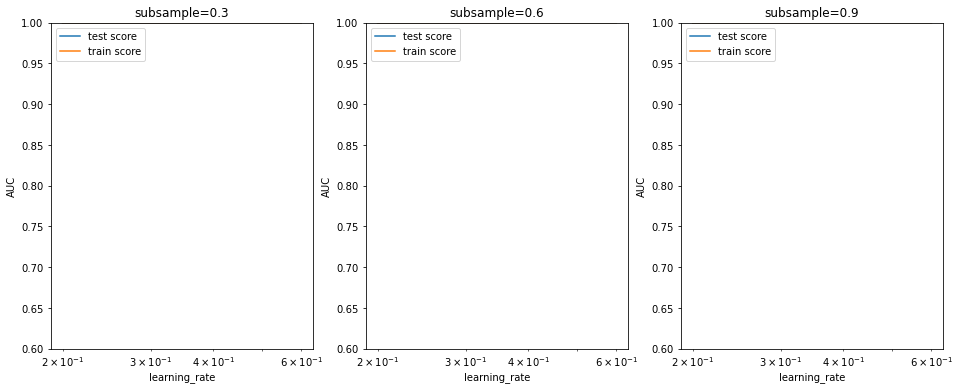

In [135]:
#plotting the learning rate vs auc 
plt.figure(figsize=(16,6))
param_grid={'learning_rate':[0.2,0.6],
           'subsample':[0.3,0.6,0.9]}
for n,subsample in enumerate (param_grid["subsample"]):
    #subplot 1/n
    plt.subplot(1,len(param_grid["subsample"]),n+1)
    df=cv_result[cv_result['param_subsample']==subsample]
    
    plt.plot(df["param_learning_rate"],df["mean_test_score"])
    plt.plot(df["param_learning_rate"],df["mean_train_score"])
    plt.xlabel("learning_rate")
    plt.ylabel("AUC")
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(["test score","train score"], loc="upper left")
    plt.xscale("log")

In [136]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [137]:
#chosen hyper parameter
params={'learning_rate':0.6,
       'max_depth':2,
       'n_estimators':200,
        'subsample':0.9,
       'objective':'binary:logistic'}
#fit model on training data
xgb_bal_smote_model=XGBClassifier(params=params)
xgb_bal_smote_model.fit(X_train_smote,y_train_smote)

[17:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

## Prediction on train

In [139]:
y_train_pred=xgb_bal_smote_model.predict(X_train_smote)

In [140]:
confusion=metrics.confusion_matrix(y_train_smote,y_train_pred)
print(confusion)

[[227449      0]
 [     0 227449]]


In [141]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [142]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_train_smote,y_train_pred))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_train_smote,y_train_pred))

Accuracy= 1.0
Sensitivity= 1.0
specificity= 1.0
f1 score= 1.0


In [143]:
#classification report
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [144]:
#predict probability
y_train_pred_probability=xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [145]:
#roc-auc
auc=metrics.roc_auc_score(y_train_smote,y_train_pred_probability)
auc

0.9999999999999999

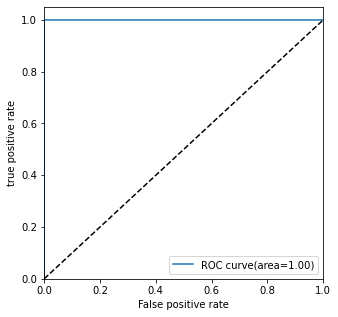

In [147]:
#plot the ROC CURVE
draw_roc(y_train_smote,y_train_pred_probability)

## Prediction on test

In [148]:
y_test_pred=xgb_bal_smote_model.predict(X_test)

In [149]:
confusion=metrics.confusion_matrix(y_test,y_test_pred)
print(confusion)

[[56849    17]
 [   19    77]]


In [150]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [151]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_test,y_test_pred))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_test,y_test_pred))

Accuracy= 0.9993679997191109
Sensitivity= 0.8020833333333334
specificity= 0.9997010515949777
f1 score= 0.8105263157894737


In [152]:
#classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.82      0.80      0.81        96

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [153]:
#predict probability
y_test_pred_probability=xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [154]:
#roc-auc
auc=metrics.roc_auc_score(y_test,y_test_pred_probability)
auc

0.9625259381704357

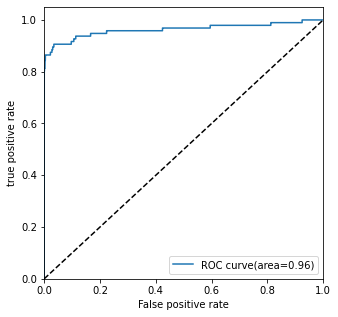

In [155]:
#plot the ROC CURVE
draw_roc(y_test,y_test_pred_probability)

Here we saw altough XGBoost is computationally exensive but shows the best result in recall and ROC on train= 1 and roc=0.97 on test set.
Also Decision tree  and random forest shows poor result in over sampling so we neglict them.

### Print the class distribution after applying SMOTE 

# AdaSyn (Adaptive Synthetic Sampling)

##### Build models on other algorithms to see the better performing on ADASYN

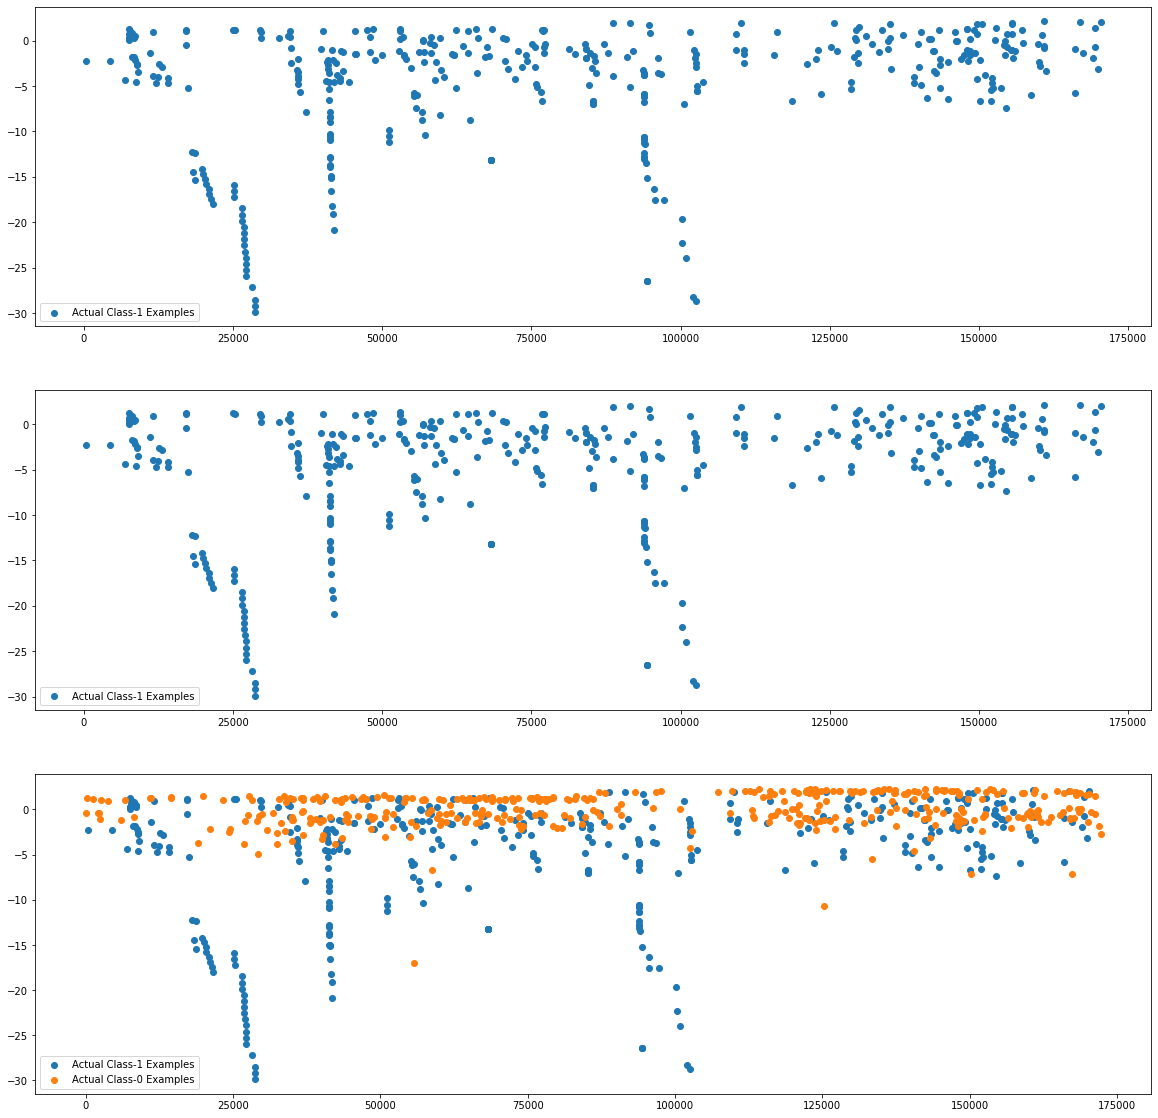

In [158]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1], label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Logistic Regression

In [159]:
#Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#creating kfold oblect  with 5 split
folds=KFold(n_splits=5, shuffle=True, random_state=4)
#Perform parameter
para={"C":[0.01,0.1,1,10,100,1000]}
#perform cross validation
model_cv=GridSearchCV(estimator=LogisticRegression(),param_grid=para,scoring="roc_auc",cv=folds,
                     verbose=1,return_train_score=True )
model_cv.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [160]:
#print the evaluation result by choosing a evaluation metric
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.248809,3.641553,0.121873,0.020726,0.01,{'C': 0.01},0.995710,0.993949,0.987727,0.995667,...,0.993386,0.002939,6,0.995535,0.993879,0.987187,0.996017,0.993831,0.993290,0.003174
1,10.839346,3.927966,0.132610,0.021620,0.1,{'C': 0.1},0.995977,0.993990,0.987793,0.995683,...,0.993473,0.002963,5,0.995795,0.993921,0.987256,0.996036,0.993874,0.993376,0.003191
2,10.678448,3.436523,0.114995,0.026323,1,{'C': 1},0.994102,0.995894,0.987800,0.995684,...,0.993481,0.002951,1,0.993890,0.995839,0.987263,0.996037,0.993878,0.993382,0.003195
3,10.367529,3.327202,0.118752,0.007650,10,{'C': 10},0.994102,0.995867,0.987800,0.995685,...,0.993476,0.002946,2,0.993891,0.995809,0.987264,0.996038,0.993879,0.993376,0.003190
4,11.153569,3.571502,0.129258,0.012078,100,{'C': 100},0.994102,0.995867,0.987800,0.995685,...,0.993476,0.002946,3,0.993891,0.995809,0.987264,0.996039,0.993879,0.993376,0.003190
5,10.465708,3.515930,0.129852,0.037612,1000,{'C': 1000},0.994103,0.995867,0.987800,0.995685,...,0.993476,0.002946,4,0.993891,0.995809,0.987264,0.996038,0.993879,0.993376,0.003190


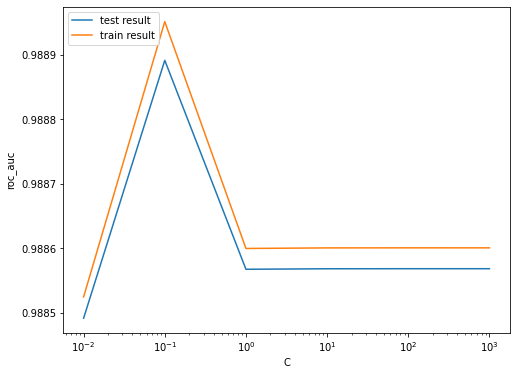

In [174]:
#plot of C versus train and validation scores
plt.figure(figsize=(8,6))
plt.plot(cv_results['param_C'],cv_results['mean_test_score'])
plt.plot(cv_results['param_C'],cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result','train result'], loc='upper left')
plt.xscale('log')

In [163]:
#Best score with best C
best_score=model_cv.best_score_
best_C_value=model_cv.best_params_['C']
print("The highest roc_auc is=")
print(best_score)
print("The highest roc_auc value at C=")
print(best_C_value)

The highest roc_auc is=
0.9934808121015062
The highest roc_auc value at C=
1


In [175]:
#Logistic regression with optimal C
logistic_bal_adasyn=LogisticRegression(C=1)

In [176]:
#Fit the model on the train set
logistic_bal_adasyn_model=logistic_bal_adasyn.fit(X_train_adasyn,y_train_adasyn)

## Prediction on the train set

In [177]:
y_train_pred=logistic_bal_adasyn_model.predict(X_train_adasyn)

In [179]:
confusion=metrics.confusion_matrix(y_train_adasyn,y_train_pred)
print(confusion)

[[222952   4497]
 [  7767 219755]]


In [180]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [181]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_train_adasyn,y_train_pred))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_train_adasyn,y_train_pred))

Accuracy= 0.9730444357992047
Sensitivity= 0.9658626418544141
specificity= 0.9802285347484491
f1 score= 0.9728536834789075


In [182]:
#classification report
print(classification_report(y_train_adasyn,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97    227449
           1       0.98      0.97      0.97    227522

    accuracy                           0.97    454971
   macro avg       0.97      0.97      0.97    454971
weighted avg       0.97      0.97      0.97    454971



In [183]:
#predict probability
y_train_pred_probability=logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [184]:
#roc-auc
auc=metrics.roc_auc_score(y_train_adasyn,y_train_pred_probability)
auc

0.9939558148089676

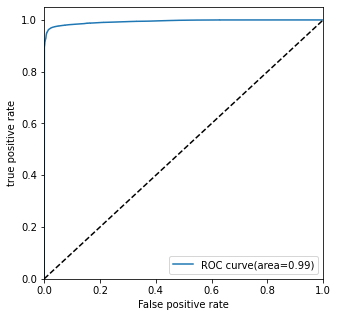

In [185]:
#plot the ROC CURVE
draw_roc(y_train_adasyn,y_train_pred_probability)

## Prediction on the test set

In [186]:
y_test_pred=logistic_bal_adasyn_model.predict(X_test)

In [187]:
confusion=metrics.confusion_matrix(y_test,y_test_pred)
print(confusion)

[[55647  1219]
 [   15    81]]


In [188]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [189]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_test,y_test_pred))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_test,y_test_pred))

Accuracy= 0.9783364348161933
Sensitivity= 0.84375
specificity= 0.9785636408398691
f1 score= 0.11604584527220631


In [190]:
#classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.84      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [191]:
#predict probability
y_test_pred_probability=logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [192]:
#roc-auc
auc=metrics.roc_auc_score(y_test,y_test_pred_probability)
auc

0.9514196935192675

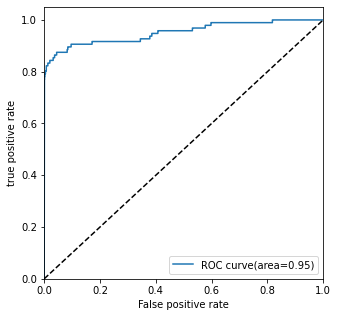

In [193]:
#plot the ROC CURVE
draw_roc(y_test,y_test_pred_probability)

## XGBoost using ADASYN

In [194]:
#Hyper parameter tuning with XGBoost
#creating a KFold  object
folds=3
#specify range of hyperparameters
param_grid ={'learning_rate':[0.2,0.6],
            'subsample':[0.3,0.6,0.9]}
#specify model
xgb_model=XGBClassifier(max_depth=2,n_estimators=200,eval_metric='mlogloss')
#set up GridSearchCV()
model_cv=GridSearchCV(estimator=xgb_model,
                     param_grid=param_grid,scoring='roc_auc',
                     cv=folds,verbose=1,return_train_score=True)
#fit the model
model_cv.fit(X_train_adasyn ,y_train_adasyn )

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
            

In [199]:
#print the evaluation result by choosing a evaluation metric
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,77.393977,4.350299,0.367357,0.073842,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999540,0.999437,0.999720,0.999566,0.000117,4,0.999925,0.999923,0.999926,0.999925,1.111510e-06
1,106.550688,4.386061,0.331407,0.011825,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999423,0.999434,0.999720,0.999526,0.000137,5,0.999920,0.999921,0.999929,0.999923,3.758797e-06
2,126.812785,2.069003,0.321054,0.006444,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999309,0.999457,0.999679,0.999482,0.000152,6,0.999920,0.999919,0.999922,0.999920,1.236032e-06
3,72.328220,2.848801,0.343888,0.013804,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999885,0.999865,0.999951,0.999900,0.000037,3,0.999997,0.999995,0.999997,0.999996,1.082500e-06
4,99.167180,1.960927,0.341802,0.006925,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999947,0.999917,0.999952,0.999939,0.000016,1,0.999995,0.999995,0.999998,0.999996,1.390179e-06
5,124.469348,3.804830,0.384693,0.039410,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999934,0.999907,0.999949,0.999930,0.000017,2,0.999996,0.999995,0.999997,0.999996,9.515906e-07


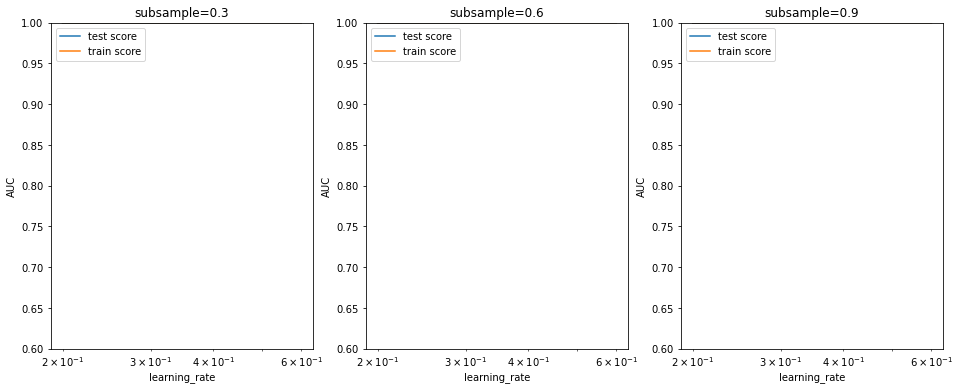

In [200]:
#plotting the learning rate vs auc 
plt.figure(figsize=(16,6))
param_grid={'learning_rate':[0.2,0.6],
           'subsample':[0.3,0.6,0.9]}
for n,subsample in enumerate (param_grid["subsample"]):
    #subplot 1/n
    plt.subplot(1,len(param_grid["subsample"]),n+1)
    df=cv_result[cv_result['param_subsample']==subsample]
    
    plt.plot(df["param_learning_rate"],df["mean_test_score"])
    plt.plot(df["param_learning_rate"],df["mean_train_score"])
    plt.xlabel("learning_rate")
    plt.ylabel("AUC")
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(["test score","train score"], loc="upper left")
    plt.xscale("log")

In [201]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [203]:
#chosen hyper parameter
params={'learning_rate':0.6,
       'max_depth':2,
       'n_estimators':200,
        'subsample':0.6,
       'objective':'binary:logistic'}
#fit model on training data
xgb_bal_adasyn_model=XGBClassifier(params=params)
xgb_bal_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

[18:57:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

## Prediction on train set

In [204]:
y_train_pred=xgb_bal_adasyn_model.predict(X_train_adasyn)

In [205]:
confusion=metrics.confusion_matrix(y_train_adasyn,y_train_pred)
print(confusion)

[[227449      0]
 [     0 227522]]


In [206]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [207]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_train_adasyn,y_train_pred))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_train_adasyn,y_train_pred))

Accuracy= 1.0
Sensitivity= 1.0
specificity= 1.0
f1 score= 1.0


In [208]:
#classification report
print(classification_report(y_train_adasyn,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227522

    accuracy                           1.00    454971
   macro avg       1.00      1.00      1.00    454971
weighted avg       1.00      1.00      1.00    454971



In [209]:
#predict probability
y_train_pred_probability=xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [210]:
#roc-auc
auc=metrics.roc_auc_score(y_train_adasyn,y_train_pred_probability)
auc

1.0

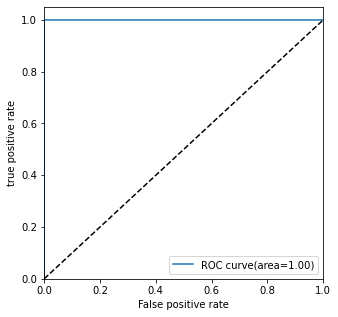

In [211]:
#plot the ROC CURVE
draw_roc(y_train_adasyn,y_train_pred_probability)

## Prediction on test set

In [226]:
y_test_pred=xgb_bal_adasyn_model.predict(X_test)

In [228]:
confusion=metrics.confusion_matrix(y_test,y_test_pred)
print(confusion)

[[56849    17]
 [   20    76]]


In [214]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0]#true negitive
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [215]:
#Let's check the overall accuracy,sensitivity,specificity,f1 score
print("Accuracy=",metrics.accuracy_score(y_test,y_test_pred))
print("Sensitivity=",TP/float(TP+FN))
print("specificity=",TN/float(TN+FP))
print("f1 score=",f1_score(y_test,y_test_pred))

Accuracy= 0.9993504441557529
Sensitivity= 1.0
specificity= 1.0
f1 score= 0.8042328042328043


In [216]:
#classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.82      0.79      0.80        96

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [217]:
#predict probability
y_test_pred_probability=xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [218]:
#roc-auc
auc=metrics.roc_auc_score(y_test,y_test_pred_probability)
auc

0.9714330252992415

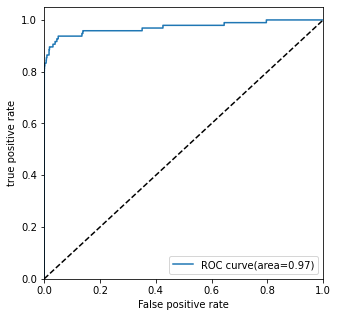

In [219]:
#plot the ROC CURVE
draw_roc(y_test,y_test_pred_probability)

We are not going to perform Decision tree and random forest because they does not perform well on large data set.

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [221]:
# perform the best oversampling method on X_train & y_train

clf = LogisticRegression(C=0.1) #initialise the model with optimum hyperparameters
clf.fit(X_train_smote,y_train_smote ) # fit on the balanced dataset
 #print the evaluation score on the X_test by choosing the best evaluation metric

LogisticRegression(C=0.1)

### Print the important features of the best model to understand the dataset

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [223]:
print('Train auc =', metrics.roc_auc_score(y_train_smote,y_train_pred_probability_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote,y_train_pred_probability_log_bal_smote   )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9871120184211395
0.6780396917802103


We can see threshold=0.67 and Train auc=0.98

# Choosing the best Model on the balanced data

Although XGBoost  work best on the all the over sampling methods but it is computionally high so we have to move towards logistic regression.
logistic regression on Random oversampling shows 0.96 on training and 0.94 on test set
whereas 0.99 on training and 0.96 on test set while using Adasyn.Also logistic regression works best on SMOTE with 0.99 traing and 0.95 on test set.

## LOGISTIC REGRESSION WITH SMOTE  SHOWS THE BEST PERFORMANCE

We have to see the recall here and we choose logistic regression due to its simplicity and less resource requirement.